In [1]:
# load libraries
import json
import pandas as pd
import numpy
import matplotlib.pyplot  as plt
import seaborn as sns 
import re

In [2]:
#settings
color = sns.color_palette()
sns.set_style("dark")

# set font and plot size to be larger
plt.rcParams.update({'font.size': 15, 'figure.figsize': (10, 8)})

In [3]:
# set working directory 
import os
os.chdir("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)")
os.getcwd()

"C:\\Users\\Fu's Computer\\Desktop\\MBusA Module 5\\Business Case Study\\yelp_dataset (1)"

# Data preparation

In [4]:
#read in business.json as pandas df 
bus_df = pd.read_json('business.json',lines=True)
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [5]:
# What are the popular business categories?
bus_df.fillna(value=pd.np.nan, inplace=True)

business_cats=' '.join(bus_df['categories'].astype(str))

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")

# Select top 100 most frequent categories
x=x.sort_values(ascending=False)
x=x.iloc[0:100]

There are  65801  different types/categories of Businesses in Yelp!


In [6]:
# How many businesses are there that are categorised in the top 100 categories?
top100_categories = list(x.index.values)
top100_categories='|'.join(top100_categories)
top100_categories = bus_df.loc[bus_df["categories"].str.contains(("Restaurants|Shopping|Food|Home Services|Health & Medical|Nightlife|Beauty & Spas|Local Services|Bars|Event Planning & Services|Automotive|Active Life|Fashion|Home & Garden|American (Traditional)| Sandwiches| Professional Services| Arts & Entertainment| Fast Food| Coffee & Tea| Breakfast & Brunch| Doctors| Specialty Food| Hair Salons| American (New)| Burgers| Fitness & Instruction| Hotels & Travel| Real Estate| Pizza| Auto Repair| Hair Removal| Skin Care| Italian| Education| Dentists| Desserts| Women's Clothing| Cafes| Bakeries| Beer| Wine & Spirits| Contractors| Nail Salons| Restaurants Restaurants| Grocery| General Dentistry| Waxing| Massage| Pets| Salad| Day Spas| Caterers| Mexican| Chicken Wings| Sports Bars| Pet Services| Home Decor| Gyms| Chinese| Mags| Pubs| Cosmetics & Beauty Supply| Flowers & Gifts| Venues & Event Spaces| Accessories| Seafood| Sporting Goods| Cosmetic Dentists| Hotels| Tires| Trainers| Furniture Stores| Hair Stylists| Men's Clothing| Financial Services| Japanese| Arts & Crafts| Ice Cream & Frozen Yogurt| Oil Change Stations| Delis| Eyelash Service| Massage Therapy| Music & Video| Asian Fusion| Lounges| Canadian (New)| Specialty Schools| Books| Apartments| Department Stores| Convenience Stores| IT Services & Computer Repair| Electronics| Sushi Bars| Mediterranean| Auto Parts & Supplies| Party & Event Planning| Medical Centers| Juice Bars & Smoothies"),regex = True,na=False)]

print("The top 100 categories account for",round(len(top100_categories)/len(bus_df),2)*100,"% of Businesses in Yelp!")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


The top 100 categories account for 97.0 % of Businesses in Yelp!


In [7]:
# filter for only restaurants-type businesses
bus_df_clean = bus_df.loc[bus_df["categories"].str.contains(("Restaurants|Food|Health Markets|Bars|American|Sandwiches|Fast Food|Coffee & Tea|Breakfast & Brunch|Specialty Food|Burgers|Pizza|Italian|Desserts|Cafes|Bakeries|Beer|Wine & Spirits|Grocery|Salad|Caterers|Mexican|Chicken Wings|Chinese|Pubs|Seafood|Japanese|Ice Cream & Frozen Yogurt|Delis|Asian Fusion|Lounges|Canadian|Sushi Bars|Mediterranean|Juice Bars & Smoothies"),regex = True,na=False)]
print("Restaurant categories account for",round(len(bus_df_clean)/len(bus_df),2)*100,"% of Businesses in Yelp!")

Restaurant categories account for 40.0 % of Businesses in Yelp!


In [8]:
# filter for only businesses in America 
bus_df_clean = bus_df_clean[bus_df_clean['state'].str.contains('AB|QC|NS|NB|MB|BC|PE|SK|NL|BAS|XGM|XWY|CON|DUR|XGL|DOW|ON') == False]

## Some exploratory data analysis

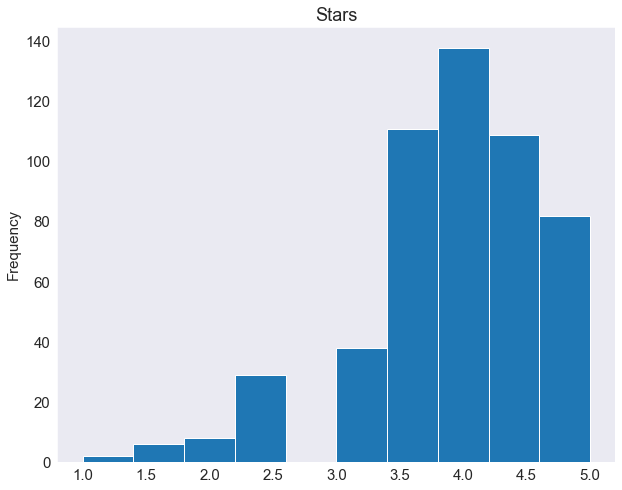

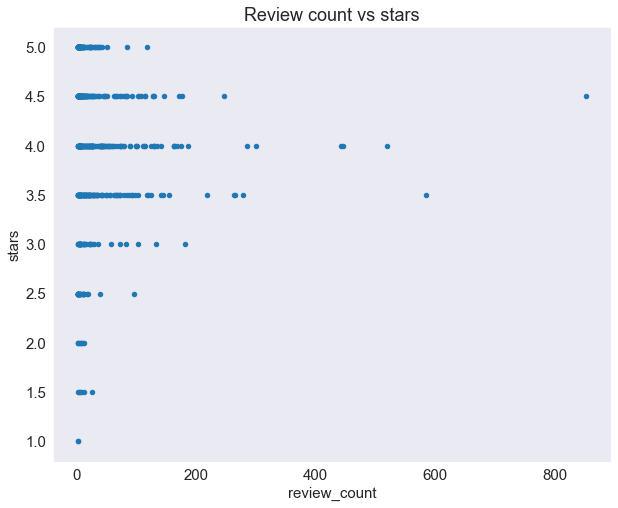

In [9]:
# Example - what is the star distribution of restaurants that are categorised as 'healthy'?
test = bus_df_clean.loc[bus_df_clean["categories"].str.contains(('Health Market'),regex = True,na=False)]
test['stars'].plot(kind='hist', title='Stars')
test.plot(kind='scatter', x='review_count', y='stars', title='Review count vs stars')
best_health_restaurants = test[(test['stars'] >= 4) & (test['review_count']>=200)] 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

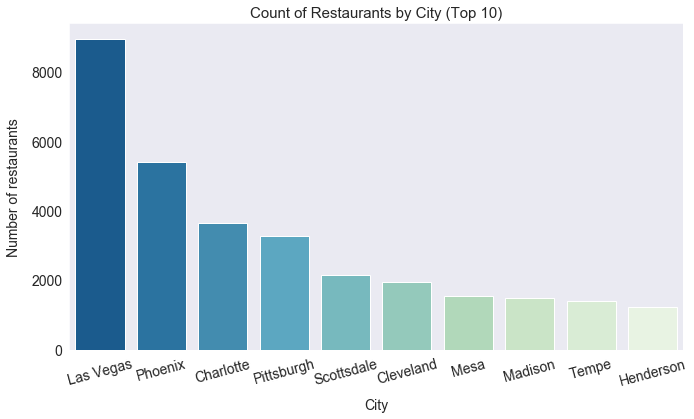

In [10]:
# Top 10 cities with most restaurants
plt.figure(figsize=(11,6))
grouped = bus_df_clean.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

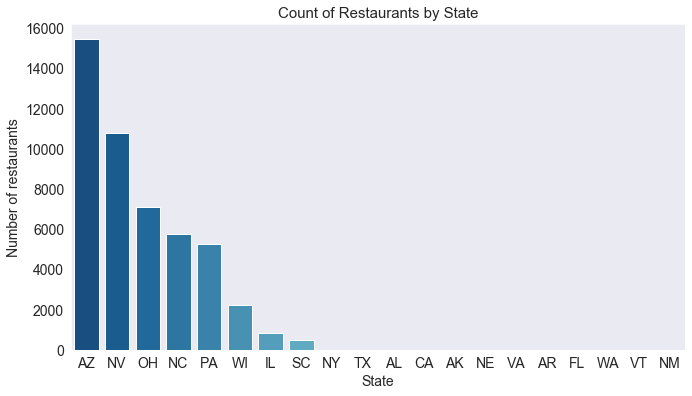

In [11]:
# Distribution of restaurants in each state
plt.figure(figsize=(11,6))
grouped = bus_df_clean.state.value_counts()
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

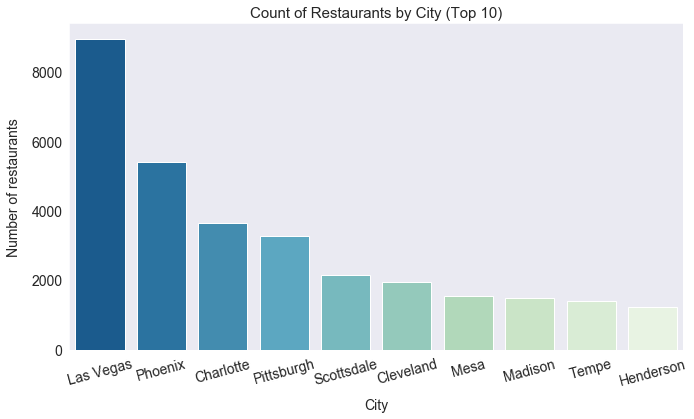

In [12]:
# Top 10 cities with most restaurants
plt.figure(figsize=(11,6))
grouped = bus_df_clean.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

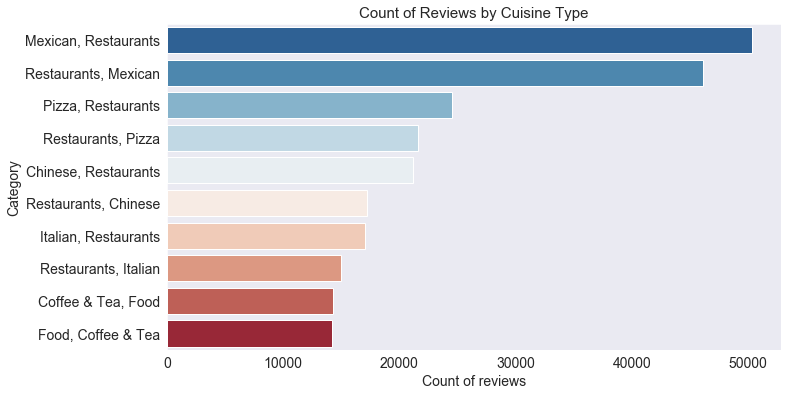

In [13]:
# Distribution of reviews by cuisine type (top 10)
plt.figure(figsize=(11,6))
grouped = bus_df_clean.groupby('categories')['review_count'].sum().sort_values(ascending = False)[:10]
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
plt.tick_params(labelsize=14)

In [15]:
# How many restaurants are currently ? 
bus_df_clean['is_open'].value_counts(normalize=True) * 100 #in percentage

1    71.99225
0    28.00775
Name: is_open, dtype: float64

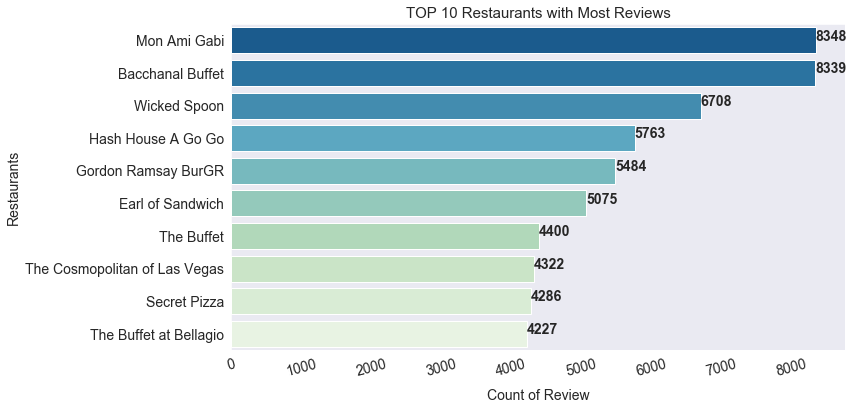

In [16]:
# Top 10 restaurants with most reviews
plt.figure(figsize=(11,6))
grouped = bus_df_clean[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

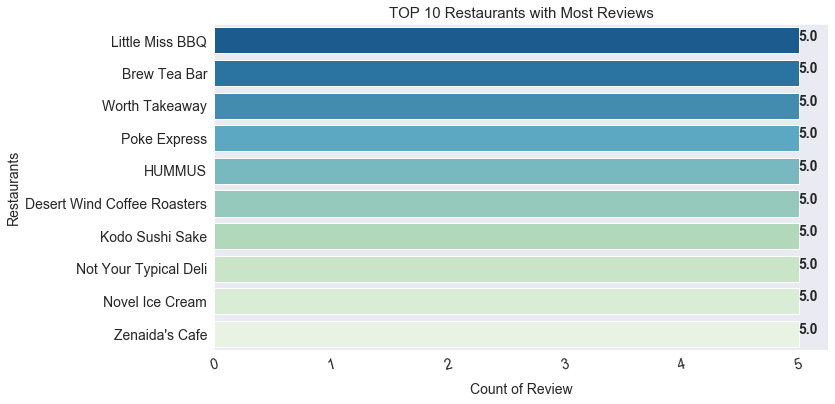

In [17]:
# Top 10 restaurants with highest star ratings 
plt.figure(figsize=(11,6))
grouped = bus_df_clean[['name','stars','review_count']].sort_values(by=['stars','review_count'], ascending=False)[:10]
sns.barplot(x=grouped.stars, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.stars):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

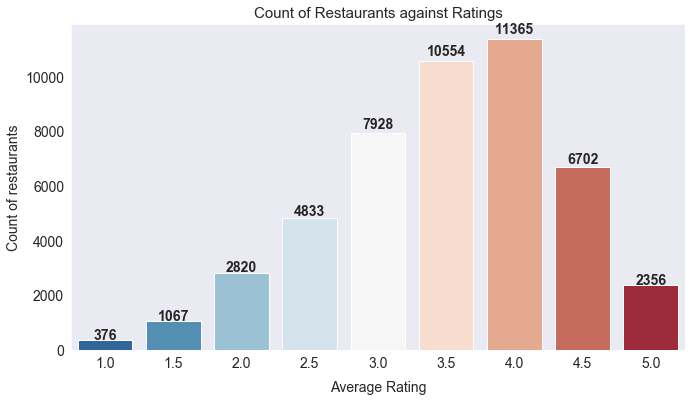

In [18]:
# Distribution of ratings by restaurants
plt.figure(figsize=(11,6))
grouped = bus_df_clean.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

## Identify cuisine type for each restaurant

In [19]:
# select out 16 cuisine types of restaurants and rename the category
bus_df_clean.is_copy=False
bus_df_clean['cuisine']=pd.Series()
bus_df_clean.loc[bus_df_clean.categories.str.contains('American'),'cuisine'] = 'American'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Mexican'), 'cuisine'] = 'Mexican'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Italian'), 'cuisine'] = 'Italian'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Japanese') & bus_df_clean.categories.str.contains('Chinese'), 'cuisine'] = 'Japanese and Chinese'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Japanese') & (bus_df_clean.categories.str.contains('Chinese') == False), 'cuisine'] = 'Japanese'
bus_df_clean.loc[(bus_df_clean.categories.str.contains('Japanese')== False) & bus_df_clean.categories.str.contains('Chinese'), 'cuisine'] = 'Chinese'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Thai'), 'cuisine'] = 'Thai'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Mediterranean'), 'cuisine'] = 'Mediterranean'
bus_df_clean.loc[bus_df_clean.categories.str.contains('French'), 'cuisine'] = 'French'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Vietnamese'), 'cuisine'] = 'Vietnamese'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Greek'),'cuisine'] = 'Greek'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Indian'),'cuisine'] = 'Indian'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Korean'),'cuisine'] = 'Korean'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Hawaiian'),'cuisine'] = 'Hawaiian'
bus_df_clean.loc[bus_df_clean.categories.str.contains('African'),'cuisine'] = 'African'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Spanish'),'cuisine'] = 'Spanish'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [20]:
#create subcategories for each restaurant

bus_df_clean['sub_cuisine'] = pd.Series()

bus_df_clean.loc[bus_df_clean.categories.str.contains('Tex') & bus_df_clean.categories.str.contains('Mex'),'sub_cuisine'] = 'Tex Mex'
bus_df_clean.loc[(bus_df_clean.categories.str.contains('Food') & bus_df_clean.categories.str.contains('Trucks'))| (bus_df_clean.categories.str.contains('Street') & bus_df_clean.categories.str.contains('Vendors')) | bus_df_clean.categories.str.contains('Stands'),'sub_cuisine'] = 'Food Stands'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Street') & bus_df_clean.categories.str.contains('Vendors'),'sub_cuisine'] = 'Street Vendors'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Hot') & bus_df_clean.categories.str.contains('Dogs'),'sub_cuisine'] = 'Hot Dogs'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Bubble') & bus_df_clean.categories.str.contains('Tea'),'sub_cuisine'] = 'Bubble Tea'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Gluten') & bus_df_clean.categories.str.contains('Free'),'sub_cuisine'] = 'Gluten Free'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Chicken') & bus_df_clean.categories.str.contains('Wings'),'sub_cuisine'] = 'Chicken Wings'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Ethnic') & bus_df_clean.categories.str.contains('Food'),'sub_cuisine'] = 'Ethnic Food'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Specialty') & bus_df_clean.categories.str.contains('Food'),'sub_cuisine'] = 'Specialty Food'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Hot') & bus_df_clean.categories.str.contains('Pot'),'sub_cuisine'] = 'Hot Pot'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Dim') & bus_df_clean.categories.str.contains('Sum'),'sub_cuisine'] = 'Dim Sum'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Latin') & bus_df_clean.categories.str.contains('American'),'sub_cuisine'] = 'Latin American'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Barbeque'),'sub_cuisine'] = 'Barbeque'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Falafel'),'sub_cuisine'] = 'Falafel'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Halal'),'sub_cuisine'] = 'Halal'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Salad'),'sub_cuisine'] = 'Salad'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Kosher'),'sub_cuisine'] = 'Kosher'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Lounges'),'sub_cuisine'] = 'Lounges'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Creperies'),'sub_cuisine'] = 'Creperies'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Brasseries'),'sub_cuisine'] = 'Brasseries'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Bistros'),'sub_cuisine'] = 'Bistros'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Lounges'),'sub_cuisine'] = 'Lounges'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Kebab'),'sub_cuisine'] = 'Kebab'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Caribbean'),'sub_cuisine'] = 'Caribbean'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Kebab'),'sub_cuisine'] = 'Kebab'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Karaoke'),'sub_cuisine'] = 'Karaoke'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Poke'),'sub_cuisine'] = 'Poke'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Caterers'),'sub_cuisine'] = 'Caterers'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Filipino'),'sub_cuisine'] = 'Filipino'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Portuguese'),'sub_cuisine'] = 'Portuguese'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Tacos'),'sub_cuisine'] = 'Tacos'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Basque'),'sub_cuisine'] = 'Basque'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Sandwiches'),'sub_cuisine'] = 'Sandwiches'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Szechuan'),'sub_cuisine'] = 'Szechuan'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Cantonese'),'sub_cuisine'] = 'Cantonese'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Seafood'),'sub_cuisine'] = 'Seafood'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Steakhouses'),'sub_cuisine'] = 'Steakhouses'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Buffets'),'sub_cuisine'] = 'Buffets'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Desserts'),'sub_cuisine'] = 'Desserts'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Izakaya'),'sub_cuisine'] = 'Izakaya'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Bars') | bus_df_clean.categories.str.contains('Nightlife') | bus_df_clean.categories.str.contains('Pubs'),'sub_cuisine'] = 'Bars'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Burgers'),'sub_cuisine'] = 'Burgers'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Vegetarian') & bus_df_clean.categories.str.contains('Vegan'),'sub_cuisine'] = 'Vegetarian'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Fast') & bus_df_clean.categories.str.contains('Food'),'sub_cuisine'] = 'Fast Food'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Pizza'),'sub_cuisine'] = 'Pizza'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Cafes'),'sub_cuisine'] = 'Cafes'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Comfort') & bus_df_clean.categories.str.contains('Food'),'sub_cuisine'] = 'Comfort Food'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Sushi') & bus_df_clean.categories.str.contains('Bars'),'sub_cuisine'] = 'Sushi Bars'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Ramen') & bus_df_clean.categories.str.contains('Noodles'),'sub_cuisine'] = 'Ramen'
bus_df_clean.loc[bus_df_clean.categories.str.contains('Breakfast') & bus_df_clean.categories.str.contains('Brunch'),'sub_cuisine'] = 'Breakfast & Brunch'


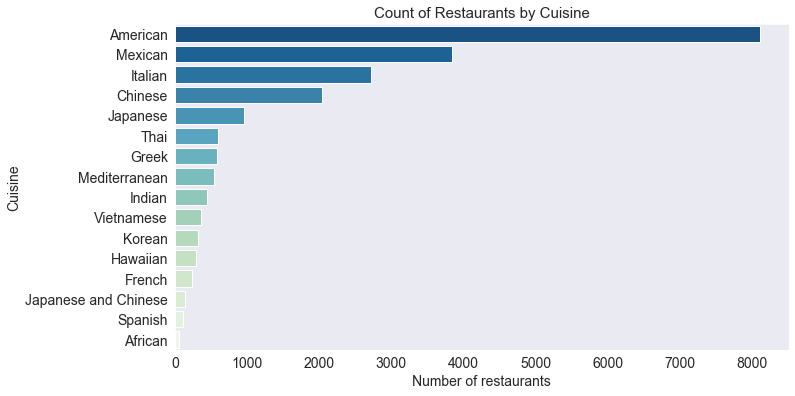

In [21]:
# Distribution of restaurants in each cuisine
plt.figure(figsize=(11,6))
grouped = bus_df_clean.cuisine.value_counts()
sns.barplot(x=grouped.values,y=grouped.index,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Cuisine', fontsize=14)
plt.xlabel('Number of restaurants', fontsize=14)
plt.title('Count of Restaurants by Cuisine', fontsize=15)
plt.tick_params(labelsize=14)

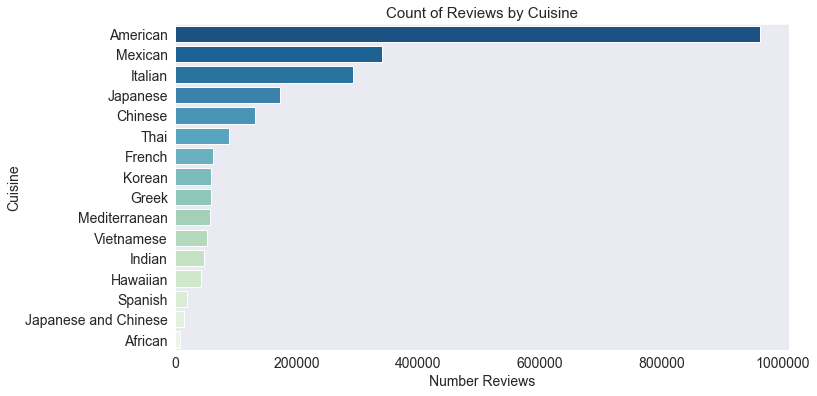

In [22]:
# Distribution of reviews in each cuisine
plt.figure(figsize=(11,6))
grouped = bus_df_clean.groupby(['cuisine']).review_count.sum().sort_values(ascending=False)
sns.barplot(x=grouped.values,y=grouped.index,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Cuisine', fontsize=14)
plt.xlabel('Number Reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine', fontsize=15)
plt.tick_params(labelsize=14)

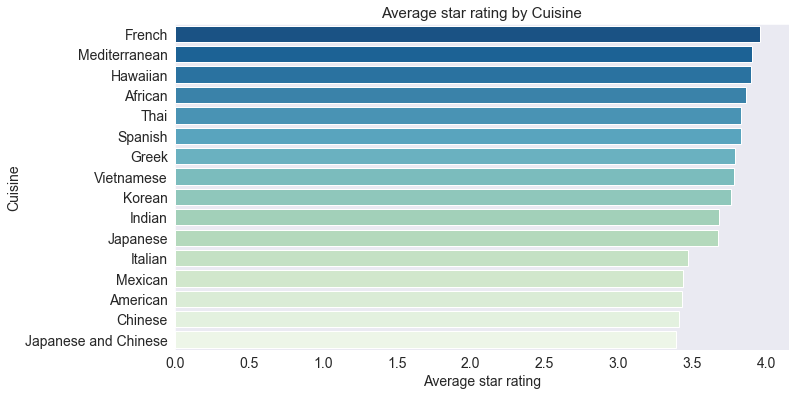

In [23]:
# Star rating in each cuisine
plt.figure(figsize=(11,6))
grouped = bus_df_clean.groupby(['cuisine']).stars.mean().sort_values(ascending=False)
sns.barplot(x=grouped.values,y=grouped.index,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Cuisine', fontsize=14)
plt.xlabel('Average star rating', fontsize=14)
plt.title('Average star rating by Cuisine', fontsize=15)
plt.tick_params(labelsize=14)

## Combine business dataframe with the reviews dataframe

In [24]:
# check shape of business df 
business = bus_df_clean
business.shape

(48001, 16)

In [25]:
# read in reviews.json as pandas df  - read in seperately due to coputing constraints
review1 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review1.pkl")
review2 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review2.pkl")
review3 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review3.pkl")
review4 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review4.pkl")

review1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671475 entries, 0 to 1671474
Data columns (total 9 columns):
review_id      1671475 non-null object
user_id        1671475 non-null object
business_id    1671475 non-null object
stars          1671475 non-null float64
useful         1671475 non-null int64
funny          1671475 non-null int64
cool           1671475 non-null int64
text           1671475 non-null object
date           1671475 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 114.8+ MB


In [26]:
# check missing values
review2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [27]:
# check the number of reviews for businesses in the business dataframe 
review1['business_id'].isin(business['business_id']).value_counts()

True     955534
False    715941
Name: business_id, dtype: int64

In [28]:
# check duplicates of review_id
review1.review_id.duplicated().sum()

0

In [29]:
# merge business table and review table - merged seperately due to computing constraints 
restaurants_reviews1 = pd.merge(business, review1, on='business_id', how='inner')
restaurants_reviews2 = pd.merge(business, review2, on='business_id', how='inner')
restaurants_reviews3 = pd.merge(business, review3, on='business_id', how='inner')
restaurants_reviews4 = pd.merge(business, review4, on='business_id', how='inner')

In [30]:
# how many rows are there 
restaurants_reviews1.shape

(955534, 24)

In [31]:
# combine dataframes
restaurants_reviews = restaurants_reviews1.append(restaurants_reviews2, ignore_index = True) 
restaurants_reviews = restaurants_reviews.append(restaurants_reviews3, ignore_index = True) 
restaurants_reviews = restaurants_reviews.append(restaurants_reviews4, ignore_index = True) 

In [32]:
# restaurant reviews contains the same amount of businesses as business df
len(restaurants_reviews['business_id'].unique().tolist())

48000

In [34]:
# drop rows where review id is missing
restaurants_reviews.dropna(subset=['review_id'],inplace=True)

In [35]:
# check missing values
restaurants_reviews.isnull().sum()

business_id           0
name                  0
address               0
city                  0
state                 0
postal_code           0
latitude              0
longitude             0
stars_x               0
review_count          0
is_open               0
attributes        15253
categories            0
hours            202113
cuisine         1315181
sub_cuisine      767759
review_id             0
user_id               0
stars_y               0
useful                0
funny                 0
cool                  0
text                  0
date                  0
dtype: int64

In [36]:
# check shape of df  (34% do not have a cuisine label)
restaurants_reviews.shape

(3811709, 24)

In [37]:
# update column names
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

In [39]:
# update date column to datetime format
restaurants_reviews['date'] =  pd.to_datetime(restaurants_reviews['date'])

In [40]:
# check data type
restaurants_reviews.dtypes

business_id             object
name                    object
address                 object
city                    object
state                   object
postal_code             object
latitude               float64
longitude              float64
avg_star               float64
review_count             int64
is_open                  int64
attributes              object
categories              object
hours                   object
cuisine                 object
sub_cuisine             object
review_id               object
user_id                 object
review_star            float64
useful                   int64
funny                    int64
cool                     int64
text                    object
date            datetime64[ns]
dtype: object

# Analysing trends in each cuisine 

In [42]:
# drop rows where cuisine is missing
review_cuisine = restaurants_reviews.dropna(subset=['cuisine'])

In [43]:
# set date as index 
review_cuisine = review_cuisine.set_index('date')

In [45]:
# select relevant columns
reviews_only = review_cuisine[['business_id','name','address','city','state','avg_star','review_count','categories','cuisine','review_id','user_id','review_star','text']]

In [47]:
# check min and max date of reviews
print (reviews_only.index.min())
print (reviews_only.index.max())

2004-10-12 10:13:32
2018-11-14 18:10:58


In [49]:
#set number of reviews in each row to 1 
reviews_only.loc[:,'number of reviews'] = int(1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
# show total number of reviews each year
reviews_only.groupby([pd.Grouper(level ='date',freq='A')])['number of reviews'].count()

date
2004-12-31         4
2005-12-31       372
2006-12-31      2333
2007-12-31      9526
2008-12-31     24076
2009-12-31     41710
2010-12-31     77185
2011-12-31    120467
2012-12-31    139820
2013-12-31    186439
2014-12-31    269392
2015-12-31    354080
2016-12-31    399340
2017-12-31    443764
2018-12-31    428020
Freq: A-DEC, Name: number of reviews, dtype: int64

In [52]:
# create column that shows total number of reviews between a date range
reviews2004 = reviews_only.loc['2004-01-01':'2004-12-31']
reviews2005 = reviews_only.loc['2005-01-01':'2005-12-31']
reviews2006 = reviews_only.loc['2006-01-01':'2006-12-31']
reviews2007 = reviews_only.loc['2007-01-01':'2007-12-31']
reviews2008 = reviews_only.loc['2008-01-01':'2008-12-31']
reviews2009 = reviews_only.loc['2009-01-01':'2009-12-31']
reviews2010 = reviews_only.loc['2010-01-01':'2010-12-31']
reviews2011 = reviews_only.loc['2011-01-01':'2011-12-31']
reviews2012 = reviews_only.loc['2012-01-01':'2012-12-31']
reviews2013 = reviews_only.loc['2013-01-01':'2013-12-31']
reviews2014 = reviews_only.loc['2014-01-01':'2014-12-31']
reviews2015 = reviews_only.loc['2015-01-01':'2015-12-31']
reviews2016 = reviews_only.loc['2016-01-01':'2016-12-31']
reviews2017 = reviews_only.loc['2017-01-01':'2017-12-31']
reviews2018 = reviews_only.loc['2018-01-01':'2018-12-31']

In [53]:
# create column that shows total number of reviews between a date range
reviews2004.loc[:,'total reviews in cal year'] = 4
reviews2005.loc[:,'total reviews in cal year'] = 372
reviews2006.loc[:,'total reviews in cal year'] = 2333
reviews2007.loc[:,'total reviews in cal year'] = 9526
reviews2008.loc[:,'total reviews in cal year'] = 24076
reviews2009.loc[:,'total reviews in cal year'] = 41710
reviews2010.loc[:,'total reviews in cal year'] = 77185
reviews2011.loc[:,'total reviews in cal year'] = 120467
reviews2012.loc[:,'total reviews in cal year'] = 139820
reviews2013.loc[:,'total reviews in cal year'] = 186439
reviews2014.loc[:,'total reviews in cal year'] = 269392
reviews2015.loc[:,'total reviews in cal year'] = 354080
reviews2016.loc[:,'total reviews in cal year'] = 399340
reviews2017.loc[:,'total reviews in cal year'] = 443764
reviews2018.loc[:,'total reviews in cal year'] = 428020

In [54]:
# create column that shows total number of reviews between a date range
reviews_only = reviews2004.append(reviews2005) 
reviews_only = reviews_only.append(reviews2006)
reviews_only = reviews_only.append(reviews2007)
reviews_only = reviews_only.append(reviews2008)
reviews_only = reviews_only.append(reviews2009)
reviews_only = reviews_only.append(reviews2010)
reviews_only = reviews_only.append(reviews2011)
reviews_only = reviews_only.append(reviews2012)
reviews_only = reviews_only.append(reviews2013)
reviews_only = reviews_only.append(reviews2014)
reviews_only = reviews_only.append(reviews2015)
reviews_only = reviews_only.append(reviews2016)
reviews_only = reviews_only.append(reviews2017)
reviews_only = reviews_only.append(reviews2018)

In [55]:
# check all rows have been appended
reviews_only.shape

(2496528, 18)

In [56]:
# normalise review count by dividing it by total number of reviews in the year
reviews_only.loc[:,'normalised review count'] = reviews_only['number of reviews']/reviews_only['total reviews in cal year']

In [57]:
# Start and end of the date range to extract (remove first few years as they have too few reviews)
start, end = '2007-01-01', '2018-11-14 18:09:01'

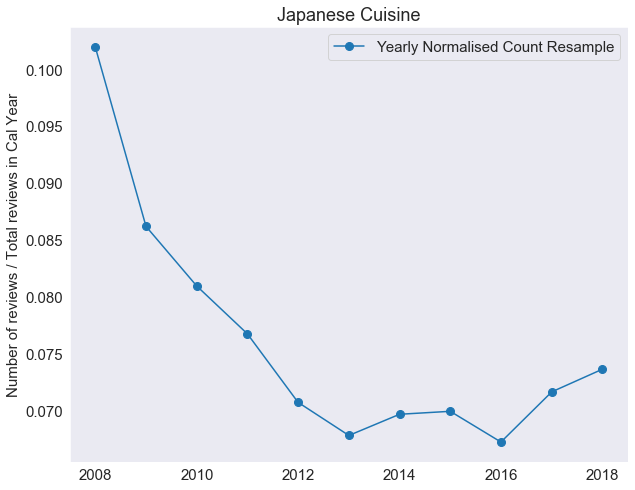

In [58]:
# seperate out Japanese cuisine
Japanese = reviews_only[reviews_only.cuisine == 'Japanese']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Japanese_yearly = Japanese[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Japanese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Japanese Cuisine');

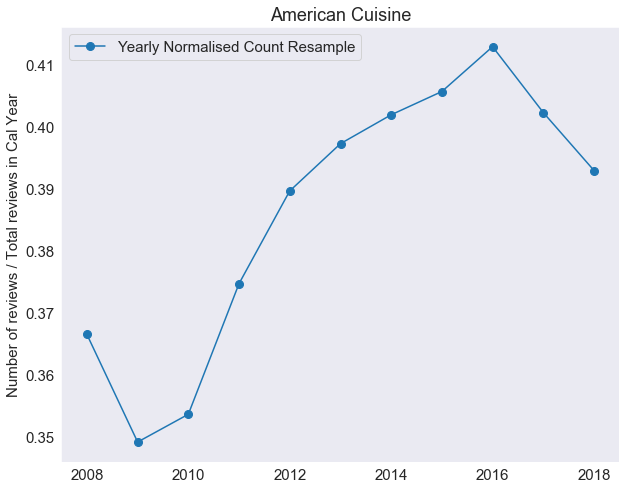

In [60]:
# Seperate out American cuisine
American = reviews_only[reviews_only.cuisine == 'American']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
American_yearly = American[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(American_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('American Cuisine');

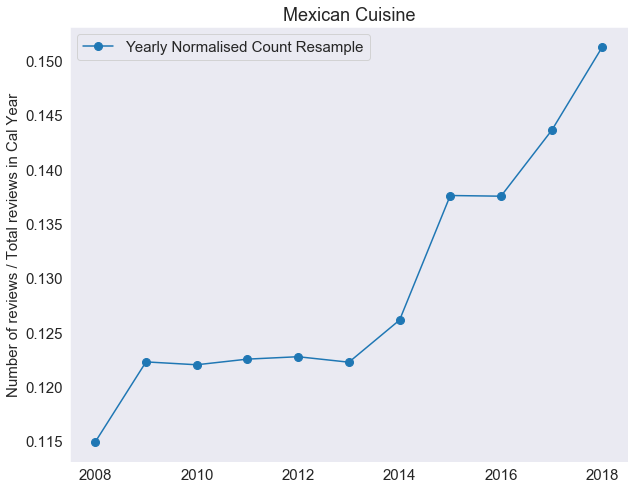

In [61]:
# Seperate out Mexican cuisine
Mexican = reviews_only[reviews_only.cuisine == 'Mexican']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Mexican_yearly = Mexican[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Cuisine');

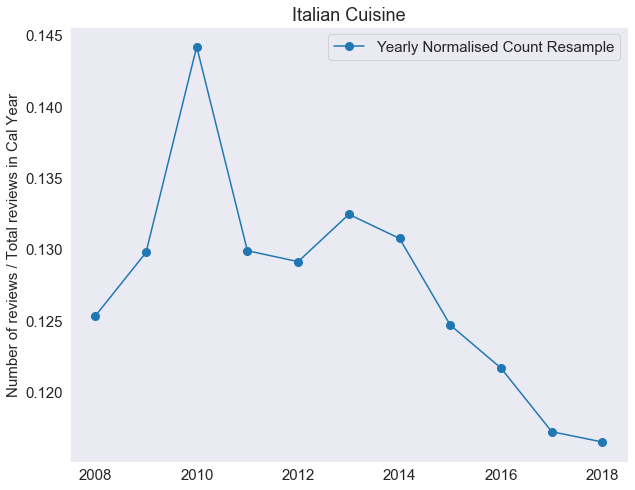

In [62]:
# Seperate out Italian cuisine
Italian = reviews_only[reviews_only.cuisine == 'Italian']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Italian_yearly = Italian[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Italian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Italian Cuisine');

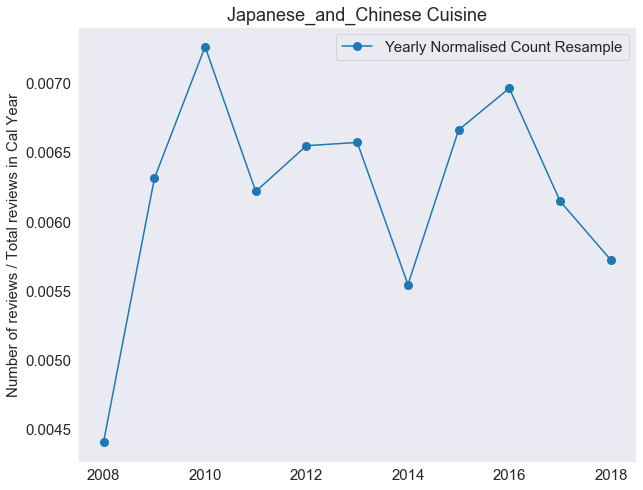

In [63]:
# Seperate out 'Japanese and Chinese' cuisine
Japanese_and_Chinese = reviews_only[reviews_only.cuisine == 'Japanese and Chinese']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Japanese_and_Chinese_yearly = Japanese_and_Chinese[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Japanese_and_Chinese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Japanese_and_Chinese Cuisine');

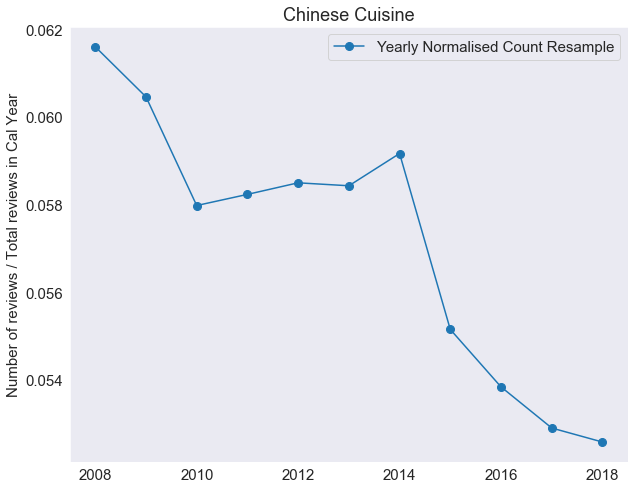

In [64]:
# Seperate out Chinese cuisine
Chinese = reviews_only[reviews_only.cuisine == 'Chinese']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Chinese_yearly = Chinese[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Chinese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Chinese Cuisine');

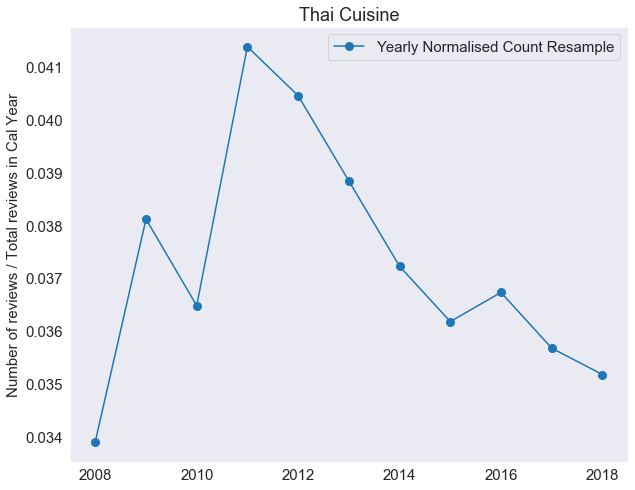

In [65]:
# Seperate out Thai cuisine
Thai = reviews_only[reviews_only.cuisine == 'Thai']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Thai_yearly = Thai[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Thai_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Thai Cuisine');

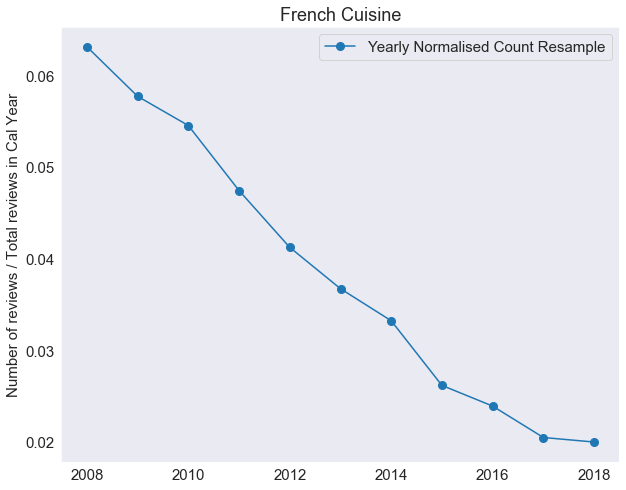

In [66]:
# Seperate out French cuisine
French = reviews_only[reviews_only.cuisine == 'French']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
French_yearly = French[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(French_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('French Cuisine');

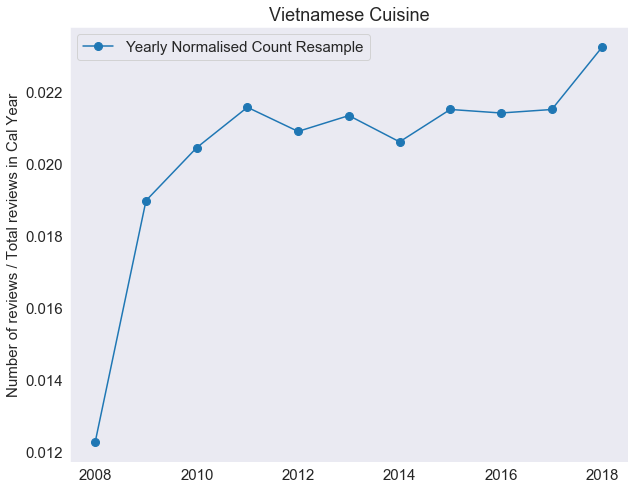

In [67]:
# Seperate out Vietnamese cuisine
Vietnamese = reviews_only[reviews_only.cuisine == 'Vietnamese']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Vietnamese_yearly = Vietnamese[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Vietnamese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Vietnamese Cuisine');

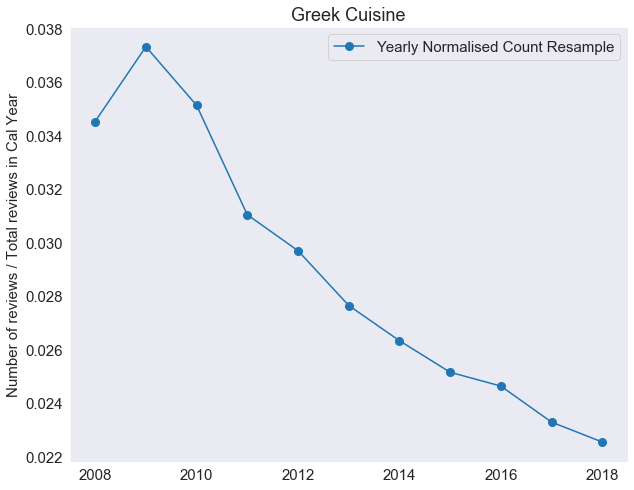

In [68]:
# Seperate out Greek cuisine
Greek = reviews_only[reviews_only.cuisine == 'Greek']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Greek_yearly = Greek[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Greek_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Greek Cuisine');

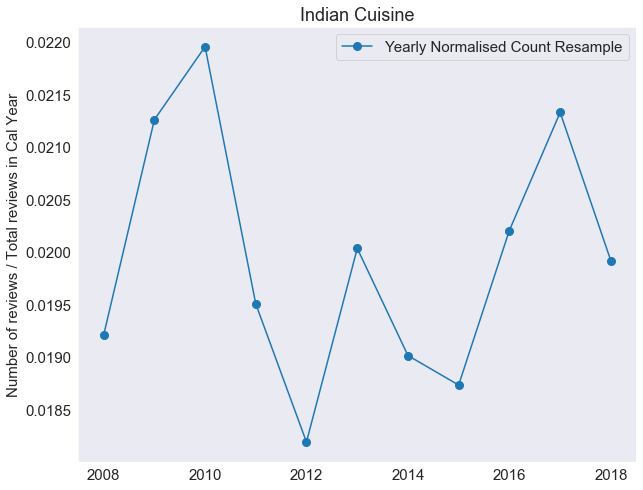

In [69]:
# Seperate out Indian cuisine
Indian = reviews_only[reviews_only.cuisine == 'Indian']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Indian_yearly = Indian[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Indian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Indian Cuisine');

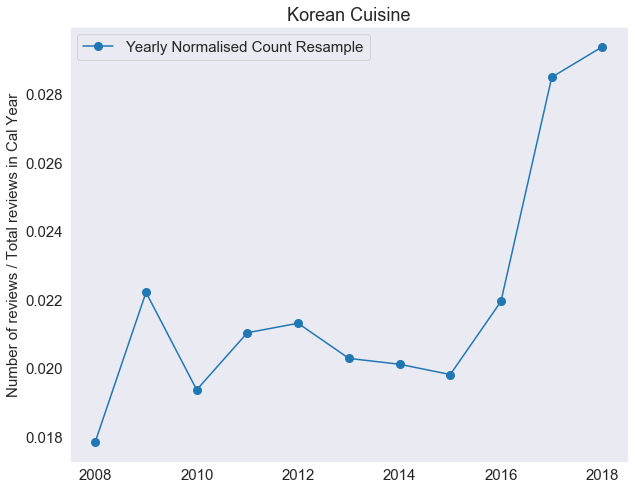

In [70]:
# Seperate out Korean cuisine
Korean = reviews_only[reviews_only.cuisine == 'Korean']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Korean_yearly = Korean[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean Cuisine');

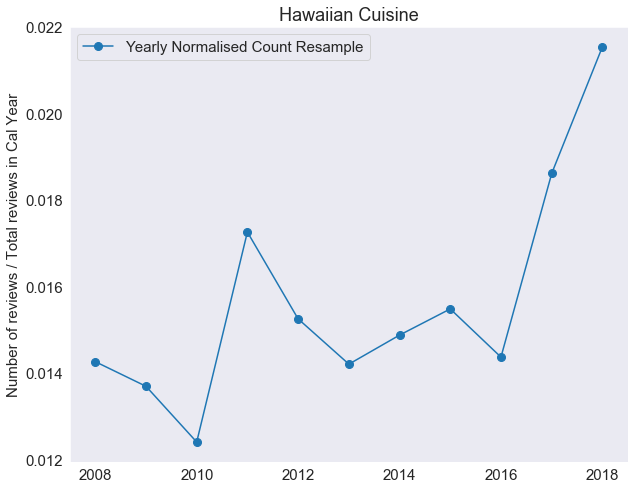

In [71]:
# Seperate out Hawaiian cuisine
Hawaiian = reviews_only[reviews_only.cuisine == 'Hawaiian']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Hawaiian_yearly = Hawaiian[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Hawaiian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Hawaiian Cuisine');

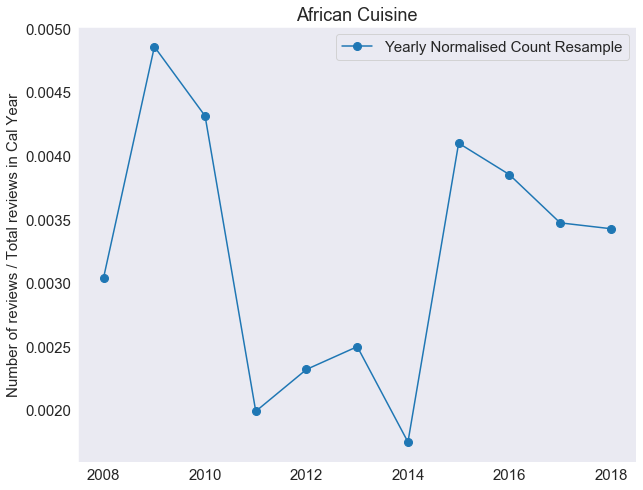

In [72]:
# Seperate out African cuisine
African = reviews_only[reviews_only.cuisine == 'African']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
African_yearly = African[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(African_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('African Cuisine');

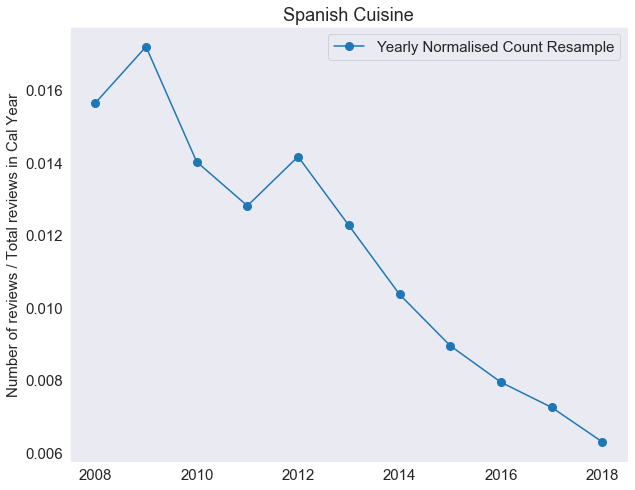

In [73]:
# Seperate out Spanish cuisine
Spanish = reviews_only[reviews_only.cuisine == 'Spanish']

# Specify the data columns we want to include 
data_columns = ['normalised review count']

# Resample to annual frequency, aggregating with mean
Spanish_yearly = Spanish[data_columns].resample('A').sum()

# Plot real time and annual resampled time series together
fig, ax = plt.subplots()
ax.plot(Spanish_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Spanish Cuisine');

The cuisines exhibiting trend an upward trend are: Hawaiian, Korean, Mexican

## Analysing trends in sub-cuisine of Hawaiian, Korean, Mexican

In [103]:
 #only select relevant columns 
sub_cuisine_analysis = restaurants_reviews[['business_id','name','city','state','avg_star','review_count','sub_cuisine','categories','cuisine','review_id','review_star','date','text']]

In [104]:
#set date as index 
sub_cuisine_analysis = sub_cuisine_analysis.set_index('date')

In [105]:
# check min and max date of reviews
print (sub_cuisine_analysis.index.min())
print (sub_cuisine_analysis.index.max())

2004-10-12 10:13:32
2018-11-14 18:13:16


In [106]:
#set number of reviews in each row to 1 
sub_cuisine_analysis.loc[:,'number of reviews'] = int(1)

In [107]:
# show total number of reviews each year
test2 = sub_cuisine_analysis.groupby([pd.Grouper(level ='date',freq='A')])['number of reviews'].count()
test2

date
2004-12-31         9
2005-12-31       659
2006-12-31      4020
2007-12-31     16131
2008-12-31     40292
2009-12-31     67153
2010-12-31    122078
2011-12-31    189499
2012-12-31    217789
2013-12-31    283596
2014-12-31    405952
2015-12-31    533274
2016-12-31    598709
2017-12-31    671829
2018-12-31    660719
Freq: A-DEC, Name: number of reviews, dtype: int64

In [108]:
# create column that shows total number of reviews between a date range
reviews2004 = sub_cuisine_analysis.loc['2004-01-01':'2004-12-31']
reviews2005 = sub_cuisine_analysis.loc['2005-01-01':'2005-12-31']
reviews2006 = sub_cuisine_analysis.loc['2006-01-01':'2006-12-31']
reviews2007 = sub_cuisine_analysis.loc['2007-01-01':'2007-12-31']
reviews2008 = sub_cuisine_analysis.loc['2008-01-01':'2008-12-31']
reviews2009 = sub_cuisine_analysis.loc['2009-01-01':'2009-12-31']
reviews2010 = sub_cuisine_analysis.loc['2010-01-01':'2010-12-31']
reviews2011 = sub_cuisine_analysis.loc['2011-01-01':'2011-12-31']
reviews2012 = sub_cuisine_analysis.loc['2012-01-01':'2012-12-31']
reviews2013 = sub_cuisine_analysis.loc['2013-01-01':'2013-12-31']
reviews2014 = sub_cuisine_analysis.loc['2014-01-01':'2014-12-31']
reviews2015 = sub_cuisine_analysis.loc['2015-01-01':'2015-12-31']
reviews2016 = sub_cuisine_analysis.loc['2016-01-01':'2016-12-31']
reviews2017 = sub_cuisine_analysis.loc['2017-01-01':'2017-12-31']
reviews2018 = sub_cuisine_analysis.loc['2018-01-01':'2018-12-31']

In [109]:
# create column that shows total number of reviews between a date range
reviews2004.loc[:,'total reviews in cal year'] = 9
reviews2005.loc[:,'total reviews in cal year'] = 659
reviews2006.loc[:,'total reviews in cal year'] = 4020
reviews2007.loc[:,'total reviews in cal year'] = 16131
reviews2008.loc[:,'total reviews in cal year'] = 40292
reviews2009.loc[:,'total reviews in cal year'] = 67153
reviews2010.loc[:,'total reviews in cal year'] = 122078
reviews2011.loc[:,'total reviews in cal year'] = 189499
reviews2012.loc[:,'total reviews in cal year'] = 217789
reviews2013.loc[:,'total reviews in cal year'] = 283596
reviews2014.loc[:,'total reviews in cal year'] = 405952
reviews2015.loc[:,'total reviews in cal year'] = 533274
reviews2016.loc[:,'total reviews in cal year'] = 598709
reviews2017.loc[:,'total reviews in cal year'] = 671829
reviews2018.loc[:,'total reviews in cal year'] = 660719

In [110]:
# create column that shows total number of reviews between a date range
sub_cuisine_analysis = reviews2004.append(reviews2005) 
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2006)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2007)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2008)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2009)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2010)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2011)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2012)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2013)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2014)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2015)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2016)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2017)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2018)

In [111]:
#normalise review count by dividing it by total number of reviews in the year
sub_cuisine_analysis.loc[:,'normalised review count'] = sub_cuisine_analysis['number of reviews']/sub_cuisine_analysis['total reviews in cal year']

In [112]:
# View number of subcuisines in file
sub_cuisine_analysis.sub_cuisine.value_counts()

Bars                  720882
Breakfast & Brunch    558499
Pizza                 323826
Sushi Bars            196041
Burgers               172781
Fast Food             170218
Desserts              112296
Seafood                92371
Steakhouses            85132
Sandwiches             84645
Cafes                  77109
Buffets                67540
Specialty Food         57384
Barbeque               52563
Caterers               40107
Comfort Food           35771
Vegetarian             35218
Tacos                  16532
Salad                  15936
Ramen                  13933
Latin American         13472
Gluten Free             9852
Chicken Wings           9285
Tex Mex                 9262
Halal                   8017
Cantonese               7018
Szechuan                6592
Bubble Tea              6236
Caribbean               6043
Hot Dogs                6034
Food Stands             5750
Filipino                5417
Dim Sum                 5043
Poke                    3679
Street Vendors

In [113]:
#check count of each cuisine type in each sub-cusine
sub_cuisine_analysis.groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine      
Barbeque     American         5641
             Chinese          3155
             Greek              95
             Hawaiian         3664
             Italian            23
                              ... 
Vegetarian   Mediterranean    2462
             Mexican          1509
             Spanish           202
             Thai             2881
             Vietnamese        722
Length: 373, dtype: int64

In [114]:
sub_cuisine_analysis.head(3)

,business_id,name,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,review_id,review_star,text,number of reviews,total reviews in cal year,normalised review count
date,,,,,,,,,,,,,,,
2004-10-19 03:05:42,GCRvrxMSC1nzShyM4Y-guQ,Body English,Las Vegas,NV,3.5,262,Bars,"Bars, Dance Clubs, Lounges, Nightlife",NaN,0O7kc-T1SrZpF84jMOyeOg,5.0,"New club in the Hard Rock, and currently the h...",1,9,0.111111
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,6POnAs_4MijROSKeOevXHQ,3.0,Not the best part of town. Not particularly g...,1,9,0.111111
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,Ef1skKLKZ9izwBmreb_-qw,4.0,"Frequently busy due to their great food, but t...",1,9,0.111111


### Haiwaiian Cuisine Analysis

Plotted trend of top 5 most frequent sub-categories and noted the following had an upward trend:
Seafood, Poke, Barbeque

In [115]:
# count number of each subcategory in Haiwaiian cuisine
Hawaiian = sub_cuisine_analysis[sub_cuisine_analysis.cuisine == 'Hawaiian']
Hawaiian.sub_cuisine.value_counts()

Sushi Bars            8599
Seafood               6149
Breakfast & Brunch    4092
Barbeque              3664
Poke                  2520
Bars                  1900
Caterers              1895
Desserts              1270
Filipino              1097
Comfort Food           963
Fast Food              920
Specialty Food         630
Cafes                  390
Salad                  329
Bubble Tea             328
Cantonese              280
Gluten Free            267
Sandwiches             263
Burgers                152
Caribbean              133
Street Vendors          95
Pizza                   46
Creperies               38
Food Stands             30
Name: sub_cuisine, dtype: int64

In [116]:
Hawaiian_Poke = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Poke') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Hawaiian_Poke_yearly = Hawaiian_Poke[data_columns].resample('A').sum()
Hawaiian_Poke_yearly.head(10)

,normalised review count
date,
2009-12-31,0.000194
2010-12-31,0.000254
2011-12-31,0.000290
2012-12-31,0.000188
2013-12-31,0.000236
2014-12-31,0.000278
2015-12-31,0.000278
2016-12-31,0.000925
2017-12-31,0.001380


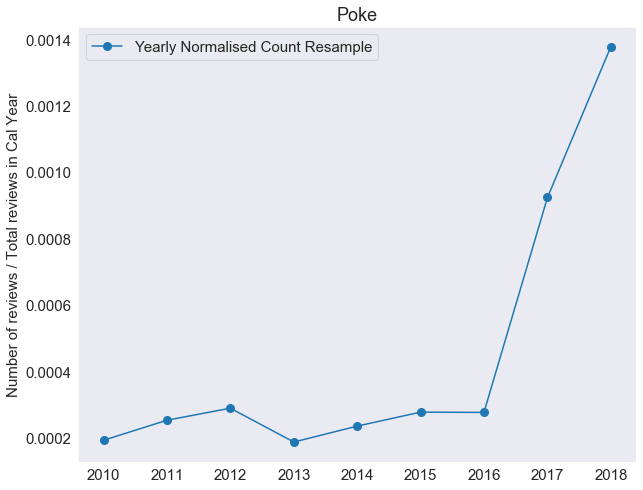

In [117]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Hawaiian_Poke_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Poke');

In [118]:
Sushi_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Sushi Bars') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Sushi_Bars_yearly = Sushi_Bars[data_columns].resample('A').sum()
Sushi_Bars_yearly.head(10)

,normalised review count
date,
2005-12-31,0.001517
2006-12-31,0.002985
2007-12-31,0.002356
2008-12-31,0.001315
2009-12-31,0.001296
2010-12-31,0.001778
2011-12-31,0.001905
2012-12-31,0.001965
2013-12-31,0.001618


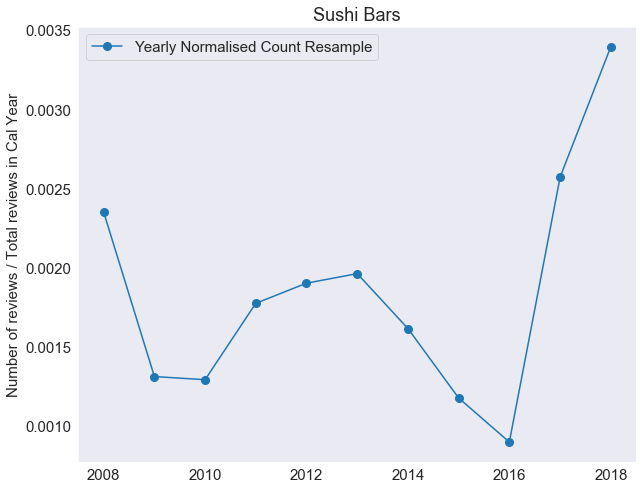

In [119]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Sushi_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Sushi Bars');

In [120]:
Barbeque = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Barbeque') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Barbeque_yearly = Barbeque[data_columns].resample('A').sum()
Barbeque_yearly.head(10)

,normalised review count
date,
2006-12-31,0.001244
2007-12-31,0.000124
2008-12-31,0.000571
2009-12-31,0.000462
2010-12-31,0.000762
2011-12-31,0.000623
2012-12-31,0.000611
2013-12-31,0.000550
2014-12-31,0.000576


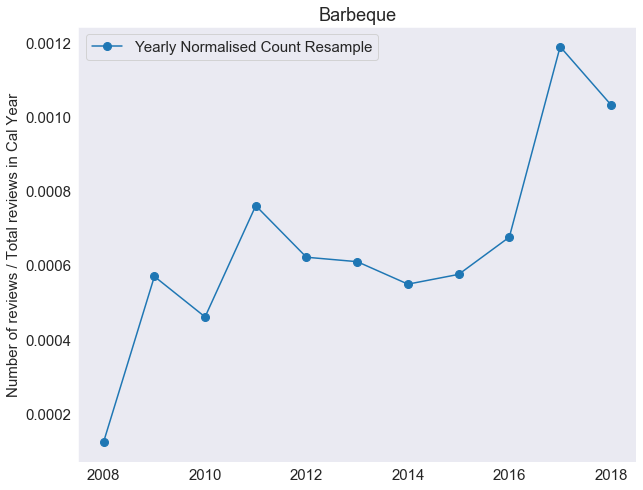

In [121]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Barbeque_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Barbeque');

In [122]:
Breakfast_Brunch = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_yearly = Breakfast_Brunch[data_columns].resample('A').sum()
Breakfast_Brunch_yearly.head(10)

,normalised review count
date,
2008-12-31,0.000248
2009-12-31,0.000328
2010-12-31,0.000745
2011-12-31,0.000623
2012-12-31,0.000482
2013-12-31,0.000434
2014-12-31,0.001148
2015-12-31,0.001054
2016-12-31,0.000937


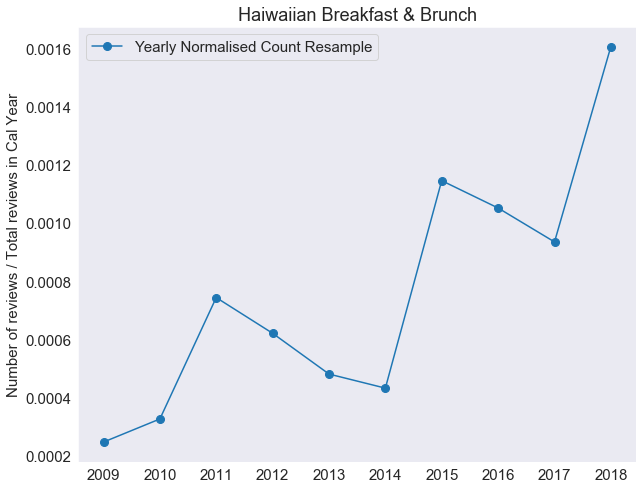

In [123]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Haiwaiian Breakfast & Brunch');

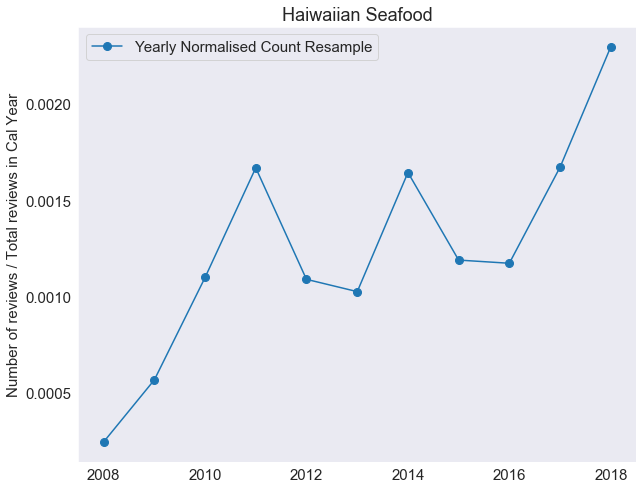

In [124]:
Seafood = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Seafood') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Seafood_yearly = Seafood[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Seafood_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Haiwaiian Seafood');

Now I am checking the number of reviews that contains the word 'poke' across all reviews. 

In [125]:
Poke = sub_cuisine_analysis
Poke ['Poke'] = pd.Series()
Poke.loc[Poke.text.str.contains('poke',case = False),'Poke'] = 1
Poke['Poke'].fillna(0, inplace=True)
Poke.head()

,business_id,name,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,review_id,review_star,text,number of reviews,total reviews in cal year,normalised review count,Poke
date,,,,,,,,,,,,,,,,
2004-10-19 03:05:42,GCRvrxMSC1nzShyM4Y-guQ,Body English,Las Vegas,NV,3.5,262,Bars,"Bars, Dance Clubs, Lounges, Nightlife",NaN,0O7kc-T1SrZpF84jMOyeOg,5.0,"New club in the Hard Rock, and currently the h...",1,9,0.111111,0.0
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,6POnAs_4MijROSKeOevXHQ,3.0,Not the best part of town. Not particularly g...,1,9,0.111111,0.0
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,Ef1skKLKZ9izwBmreb_-qw,4.0,"Frequently busy due to their great food, but t...",1,9,0.111111,0.0
2004-10-19 21:34:40,oYMsq2Xvzw6UbrIlMWjb-A,Papa John's Pizza,Champaign,IL,2.5,29,Pizza,"Restaurants, Pizza",NaN,2F5J51OYtD49eyIUKJKVgg,4.0,Love their pizza. They used to have a great ta...,1,9,0.111111,0.0
2004-10-19 21:35:14,AtLv64FV-Pw6JuT3XUKU1g,Gumby's Pizza,Champaign,IL,3.5,41,Pizza,"Food, Restaurants, Pizza",NaN,pho1XNCTeRxQVzWR_5vacg,4.0,Pokey Sticks are the best!,1,9,0.111111,1.0


In [126]:
#normalise review count by dividing it by total number of reviews in the year
Poke.loc[:,'normalised review count'] = Poke['Poke']/Poke['total reviews in cal year']

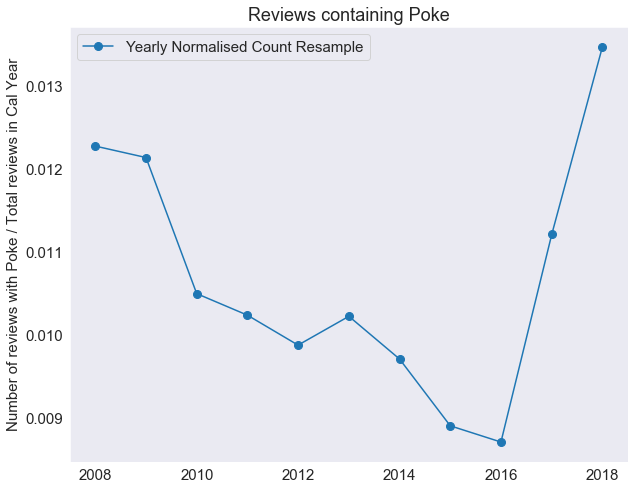

In [127]:
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Poke_yearly = Poke[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Poke_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with Poke / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing Poke');

### Korean Cuisine Analysis

Plotted trend of top 5 most frequent sub-categories and noted the following had an upward trend:
Bar, Fried Chicken, Barbeque, Fast Food 

In [128]:
# count number of each subcategory in Korean cuisine
Korean = sub_cuisine_analysis[sub_cuisine_analysis.cuisine == 'Korean']
Korean.sub_cuisine.value_counts()

Barbeque              13264
Sushi Bars             9022
Bars                   5780
Buffets                5512
Chicken Wings          1892
Breakfast & Brunch     1579
Fast Food              1305
Steakhouses            1050
Dim Sum                1038
Seafood                 947
Vegetarian              669
Food Stands             576
Pizza                   571
Hot Pot                 452
Desserts                413
Street Vendors          260
Ramen                   249
Cafes                   203
Salad                   140
Sandwiches              134
Comfort Food             77
Hot Dogs                 17
Burgers                   6
Specialty Food            3
Name: sub_cuisine, dtype: int64

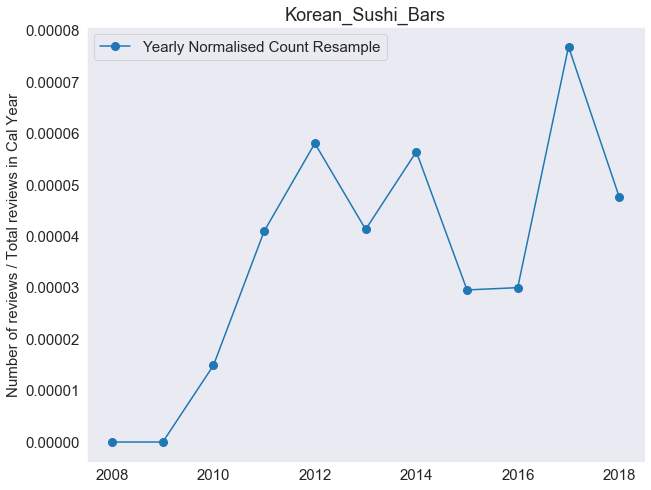

In [129]:
#plot sushi bars that are categorised as korean only 
Korean_Sushi_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Sushi Bars') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Sushi_Bars_yearly = Korean_Sushi_Bars[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Sushi_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Sushi_Bars');

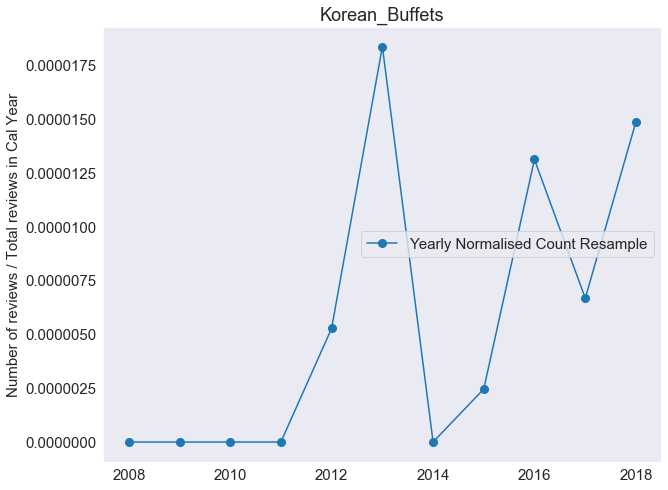

In [130]:
#plot Buffets that are categorised as korean only 
Korean_Buffets = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Buffets') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Buffets_yearly = Korean_Buffets[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Buffets_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Buffets');

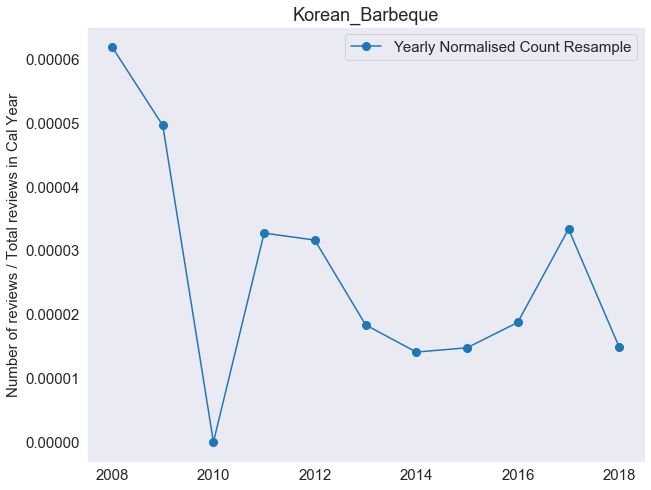

In [131]:
#plot Barbeque that are categorised as korean only 
Korean_Barbeque = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Barbeque') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Barbeque_yearly = Korean_Barbeque[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Barbeque_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Barbeque');

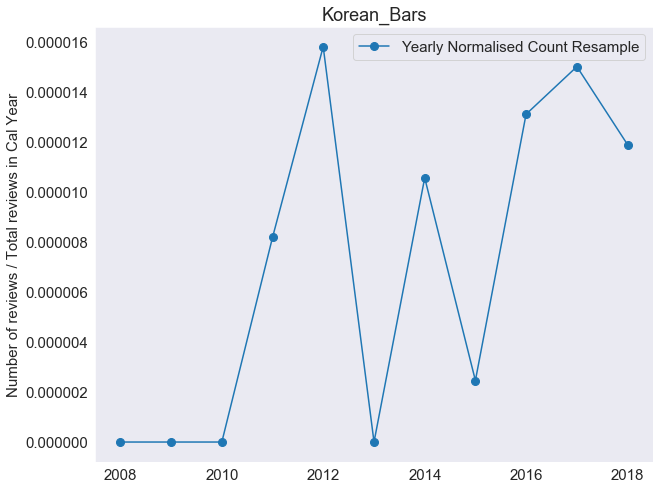

In [132]:
#plot Bars that are categorised as korean only 
Korean_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Bars') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Bars_yearly = Korean_Bars[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Bars');

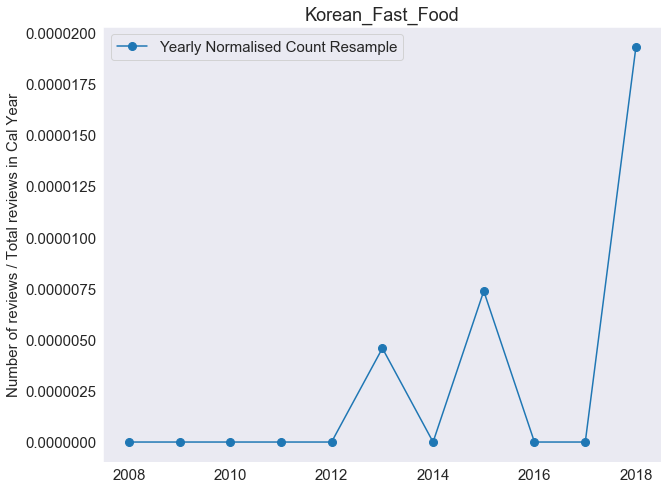

In [133]:
#plot Fast Food that are categorised as korean only 
Korean_Fast_Food = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Fast Food') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Fast_Food_yearly = Korean_Fast_Food[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Fast_Food_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Fast_Food');

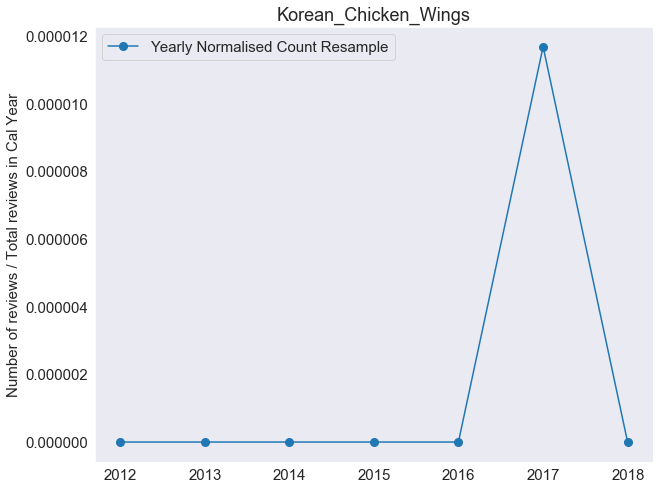

In [134]:
#plot Chicken Wings that are categorised as korean only 
Korean_Chicken_Wings = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Chicken Wings') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Chicken_Wings_yearly = Korean_Chicken_Wings[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Chicken_Wings_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Chicken_Wings');

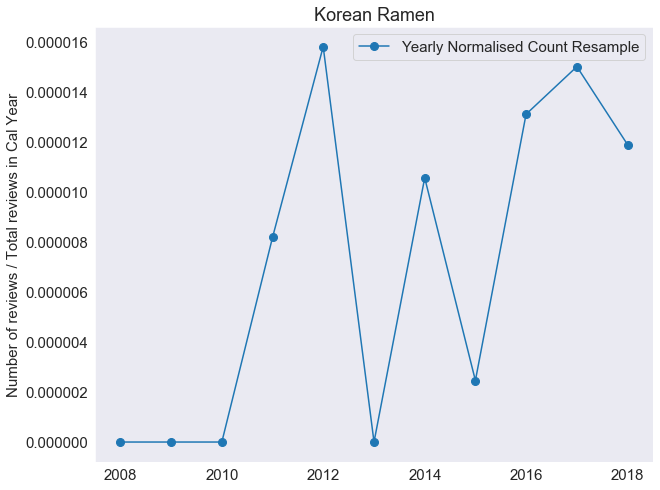

In [135]:
#plot Ramen that are categorised as korean only 
Korean_Ramen = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Ramen') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Ramen_yearly = Korean_Ramen[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean Ramen');

### Mexican Cuisine Analysis

Plotted trend of top 5 most frequent sub-categories and noted the following had an upward trend:
Bars, Taco

In [136]:
# count number of each subcategory in Mexican cuisine
Mexican = sub_cuisine_analysis[sub_cuisine_analysis.cuisine == 'Mexican']
Mexican.sub_cuisine.value_counts()

Bars                  70975
Breakfast & Brunch    41815
Fast Food             31854
Tacos                 16532
Seafood               10351
Tex Mex                8742
Burgers                6440
Latin American         6013
Caterers               5610
Desserts               4103
Specialty Food         3954
Cafes                  3678
Sushi Bars             2479
Sandwiches             2110
Salad                  2086
Food Stands            1940
Pizza                  1888
Vegetarian             1509
Street Vendors         1092
Steakhouses            1044
Caribbean              1020
Comfort Food            689
Buffets                 506
Barbeque                485
Gluten Free             369
Hot Dogs                340
Chicken Wings           310
Creperies                38
Ethnic Food               4
Kosher                    4
Name: sub_cuisine, dtype: int64

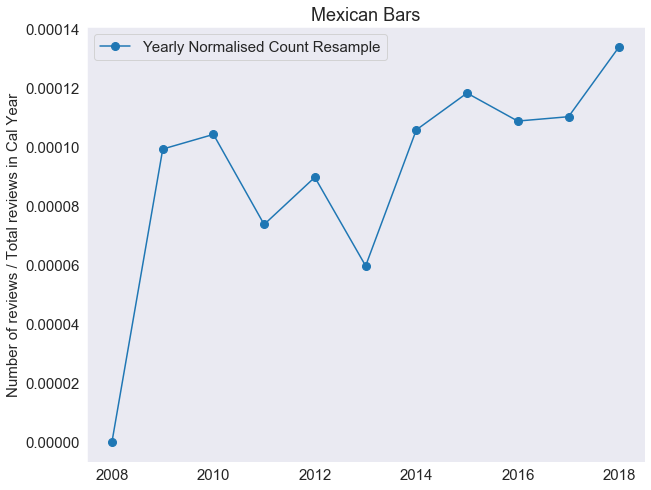

In [137]:
#plot bars that are categorised as Mexican only 
Mexican_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Bars') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Bars_yearly = Mexican_Bars[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Bars');

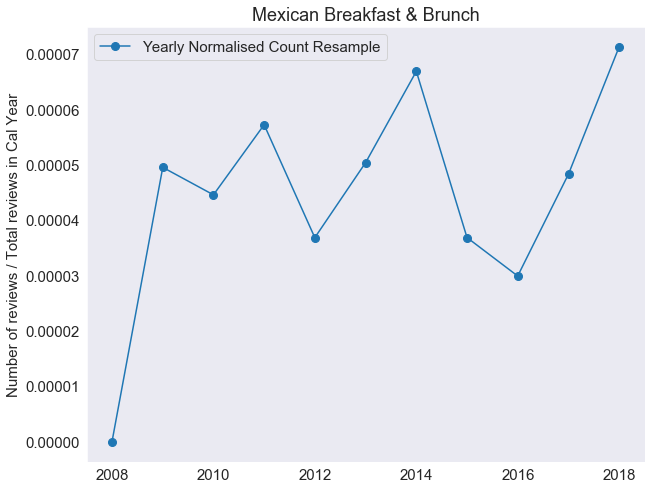

In [138]:
#plot bars that are categorised as Breakfast & Brunch only 
Mexican_Breakfast_Brunch = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Breakfast_Brunch_yearly = Mexican_Breakfast_Brunch[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Breakfast_Brunch_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Breakfast & Brunch');

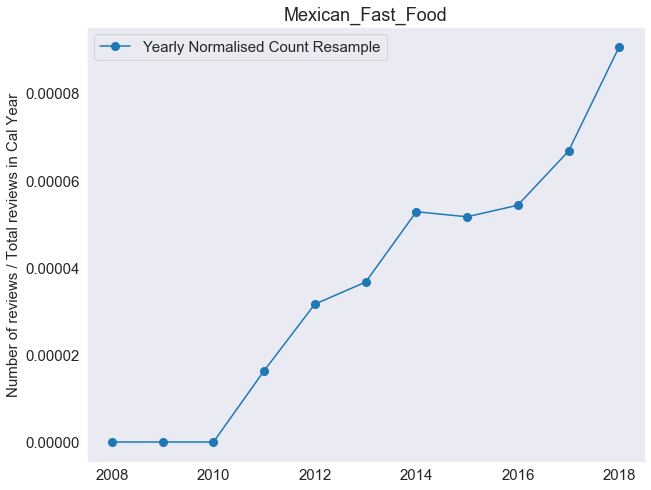

In [139]:
#plot Fast Food that are categorised as Mexican only 
Mexican_Fast_Food = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Fast Food') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Fast_Food_yearly = Mexican_Fast_Food[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Fast_Food_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican_Fast_Food');

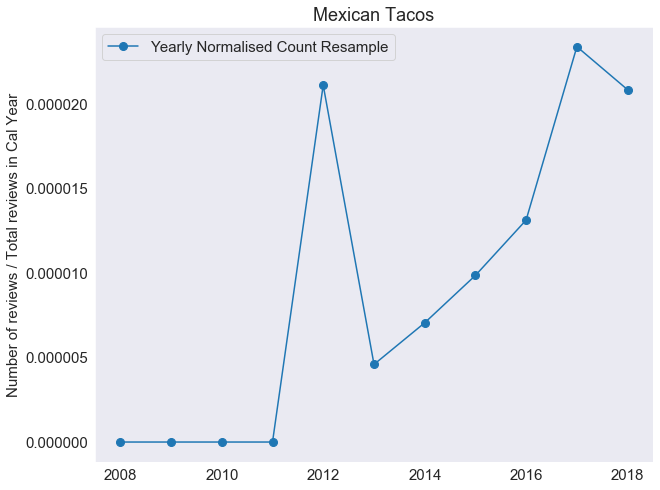

In [140]:
#plot Tacos that are categorised as Mexican only 
Mexican_Tacos = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Tacos') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Tacos_yearly = Mexican_Tacos[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Tacos_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Tacos');

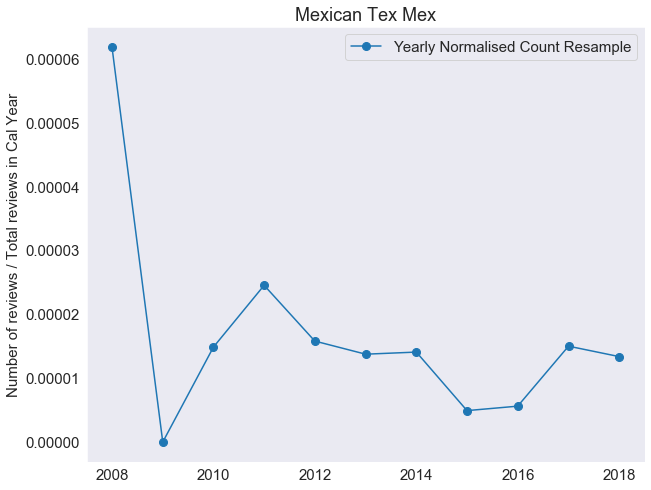

In [141]:
#plot Tex Mex that are categorised as Mexican only 
Mexican_Tex_Mex = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Tex Mex') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Tex_Mex_yearly = Mexican_Tex_Mex[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Tex_Mex_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Tex Mex');

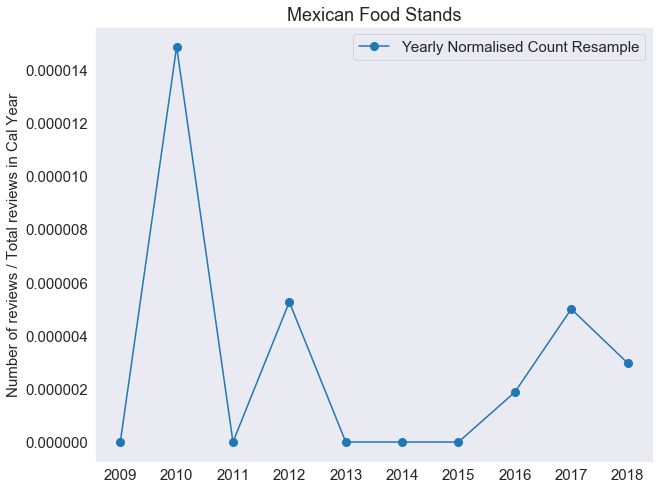

In [142]:
#plot Food Stands that are categorised as Mexican only 
Mexican_Food_Stands = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Food Stands') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Food_Stands_yearly = Mexican_Food_Stands[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Food_Stands_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Food Stands');

### Testing sub-cuisine based on an initial hypothesis - Bubble Tea

In [143]:
#Confirm Bubble Tea is mostly classified as Chinese and Vietnamese
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Bubble Tea'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine   
Bubble Tea   Chinese       527
             Hawaiian      328
             Japanese       51
             Thai          312
             Vietnamese    451
dtype: int64

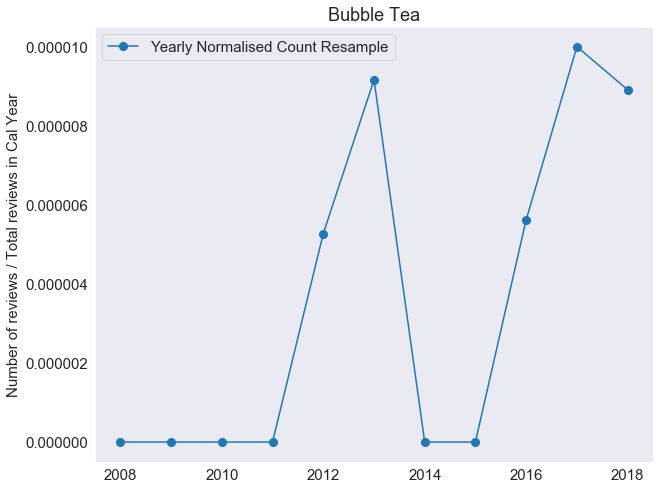

In [144]:
#plot Bubble Tea
Bubble_Tea = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Bubble Tea')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Bubble_Tea_yearly = Bubble_Tea[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Bubble_Tea_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Bubble Tea');

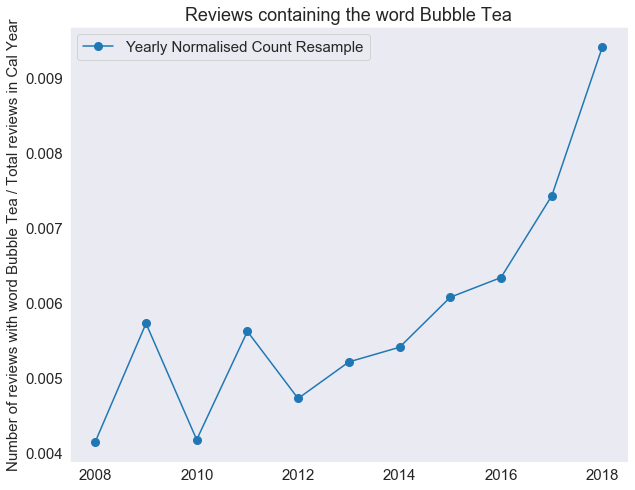

In [145]:
#reviews containing the word 'Bubble Tea'
Review_with_Bubble_Tea = sub_cuisine_analysis.copy(deep = True)
Review_with_Bubble_Tea ['Review_with_Bubble_Tea'] = pd.Series()
Review_with_Bubble_Tea.loc[Review_with_Bubble_Tea.text.str.contains('bubble tea |milk tea|boba|pearl',flags=re.IGNORECASE, regex=True),'Review_with_Bubble_Tea'] = 1
Review_with_Bubble_Tea['Review_with_Bubble_Tea'].fillna(0, inplace=True)
#normalise review count by dividing it by total number of reviews in the year
Review_with_Bubble_Tea.loc[:,'normalised review count'] = Review_with_Bubble_Tea['Review_with_Bubble_Tea']/Review_with_Bubble_Tea['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Review_with_Bubble_Tea_yearly = Review_with_Bubble_Tea[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Review_with_Bubble_Tea_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with word Bubble Tea / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing the word Bubble Tea');

### Testing sub-cuisine based on an initial hypothesis - Hot Pot

In [146]:
#Hot Pot is mostly classified as Chinese and, Korean and Japanese 
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Hot Pot'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine 
Hot Pot      American      6
             Chinese     329
             Japanese    112
             Korean      452
dtype: int64

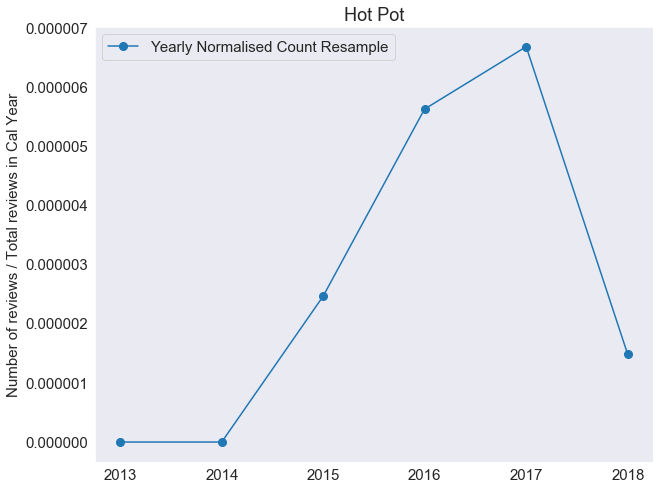

In [147]:
#plot Hot Pot 
Hot_Pot = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Hot Pot')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Hot_Pot_yearly = Hot_Pot[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Hot_Pot_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Hot Pot');

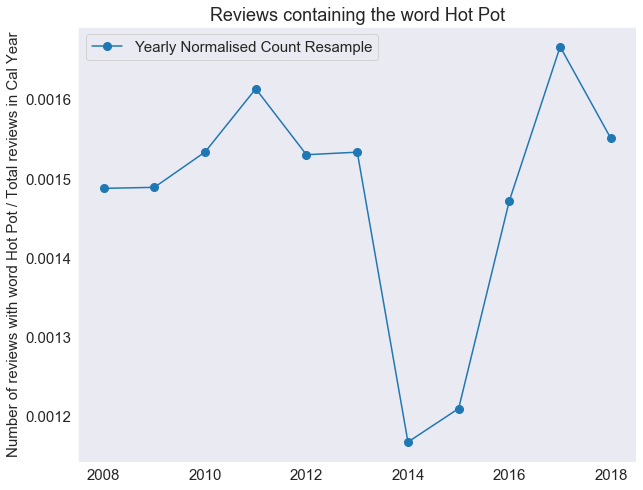

In [148]:
#reviews containing the word 'Hot Pot'
Review_with_Hot_Pot = sub_cuisine_analysis.copy(deep=True)
Review_with_Hot_Pot ['Review_with_Hot_Pot'] = pd.Series()
Review_with_Hot_Pot.loc[Review_with_Hot_Pot.text.str.contains('hot pot|hotpot|shabu shabu',flags=re.IGNORECASE, regex=True),'Review_with_Hot_Pot'] = 1
Review_with_Hot_Pot['Review_with_Hot_Pot'].fillna(0, inplace=True)
#normalise review count by dividing it by total number of reviews in the year
Review_with_Hot_Pot.loc[:,'normalised review count'] = Review_with_Hot_Pot['Review_with_Hot_Pot']/Review_with_Hot_Pot['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Review_with_Hot_Pot_yearly = Review_with_Hot_Pot[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Review_with_Hot_Pot_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with word Hot Pot / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing the word Hot Pot');

### Testing sub-cuisine based on an initial hypothesis - Breakfast & Brunch

In [149]:
#Street Vendors is mostly classified as Mexican
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine         cuisine             
Breakfast & Brunch  African                   3618
                    American                265985
                    Chinese                   1108
                    French                   29423
                    Greek                     7102
                    Hawaiian                  4092
                    Indian                     774
                    Italian                  17773
                    Japanese                  3507
                    Japanese and Chinese      2549
                    Korean                    1579
                    Mediterranean             7273
                    Mexican                  41815
                    Spanish                   1413
                    Thai                       780
                    Vietnamese                 455
dtype: int64

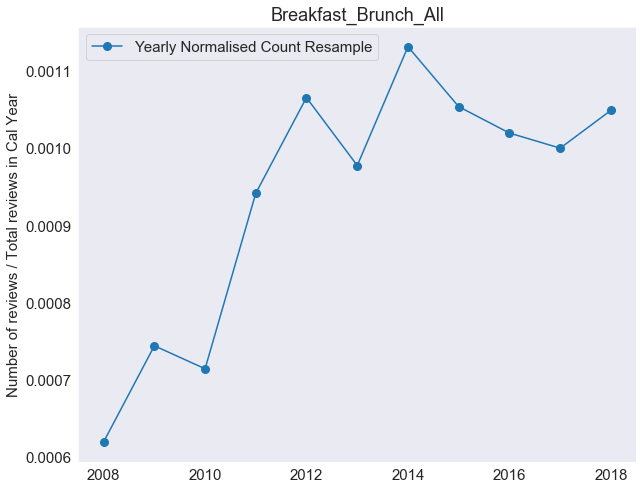

In [150]:
#plot Breakfast & Brunch
Breakfast_Brunch_All = sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_All_yearly = Breakfast_Brunch_All[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_All_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Breakfast_Brunch_All');

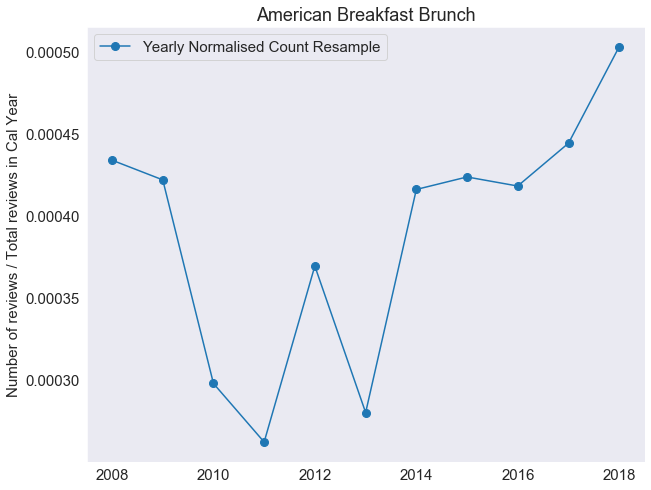

In [151]:
#plot American Breakfast & Brunch only
Breakfast_Brunch_American = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'American')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_American_yearly = Breakfast_Brunch_American[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_American_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('American Breakfast Brunch');

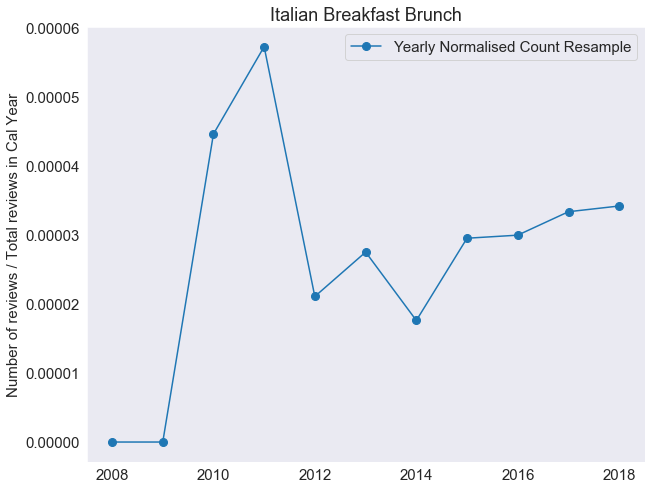

In [152]:
#plot Italian Breakfast & Brunch only
Breakfast_Brunch_Italian = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'Italian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_Italian_yearly = Breakfast_Brunch_Italian[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_Italian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Italian Breakfast Brunch');